## Problem 7.18

To find the weights for the $n+1$ GLL points we need to evaluate 
$$
\omega_\alpha = \int_{-1}^{1} \ell^n_\alpha (\xi) \, \mathrm{d}\xi 
$$
for which $\ell^n_\alpha$ is a Lagrange polynomial. There is no good python function for computing Lagrange polynomials, so we will need to make our own. To compute the lagrange polynomials of degree $n$, we require the control points (GLL points) that define it. This means we need a function to compute the relevant GLL points also. In fact, this is what Problem 7.17 asks you to do. To avoid importing functions, we will copy the function that generates gll points below. Please refer to Problem 7.17 for details

In [23]:
import scipy.special as ss 
import numpy as np 
from copy import copy
import matplotlib.pyplot as plt


def gll(N, Nsegs=100): 
    # This function is the solution to 7.17. 
    # It is not the most efficient way to compute GLL points,
    # but it works!
    nroots  = n + 1              # Number of roots
    roots   = np.zeros(nroots)   # Array to hold all the roots
    leg_n   = ss.legendre(n)    # P_n  
    leg_n_1 = ss.legendre(n-1)  # P_{n-1}

    def compute_functional(xi, n, lnm1, ln):
        return n * (lnm1(xi) - xi * ln(xi))
    
    # End points 
    roots[0]   = -1
    roots[-1]  =  1
    nrts_found =  2

    if nroots > 3:
        xi_end = 0.99999
        if n%2==0:
            xi_start = 0.00001
            nrts_found += 1
        else:
            xi_start = 0.0
        segments = np.linspace(xi_start, xi_end, Nsegs)
        fseg = compute_functional(segments, n, leg_n_1, leg_n)
        # Index in the 'roots' array to store the root
        idx = int(nroots / 2) + nroots%2 
        # Loop through each segment and test if root lies within
        for iseg in range(Nsegs-1):
            if fseg[iseg] == 0:
                # Root found exactly here
                error = 0
                nrts_found += 1
            elif fseg[iseg+1] == 0:
                # Root found exactly here
                error = 0
                nrts_found += 1
            elif fseg[iseg] * fseg[iseg+1] < 0:
                # There is a change in sign between the two values:
                # Start with the current edge xi positions of the 'segment'
                a = segments[iseg]
                b = segments[iseg+1]
                error = 999
                while np.abs(error) > 1e-9:
                    grad =  compute_functional(b, n, leg_n_1, leg_n) \
                          - compute_functional(a, n, leg_n_1, leg_n)
                    this_root = a + (b-a)/2
                    error    =  compute_functional(this_root, n, leg_n_1, leg_n)
                    if error !=0:
                        if grad*error > 0:
                            b = copy(this_root)
                        else:
                            a = copy(this_root)
                roots[idx] = this_root
                idx += 1
                nrts_found+=2
                
        for irt in range(1, int(n/2) + n%2):
            i1 = int(nroots/2) -irt
            i2 = int(nroots/2) +irt  - n%2 
            roots[i1] = -roots[i2]
        return roots 
    

Next, lets write a function to compute the Lagrange polynomials: 

In [ ]:
def lagrange(N, a, x, GLL):
    # Computes a'th Lagrange polynomial of degree N at points x
    # using control points specified in GLL array
    poly = 1
    for j in range(0, N+1):
        if j != a:
            poly = poly * ((x - GLL[j]) / (GLL[a] - GLL[j]))
    return poly

Now this is all set up, its straightforward to compute the weights. Let us define a value for $n$, and compute the lagrange polynomials over the interval $[-1, 1]$. From this, we can integrate to compute the weights:

Weights for degree 5: 
0 0.06666900466679278
1 0.37847201994856156
2 0.5548589753846457
3 0.5548589753846458
4 0.37847201994856156
5 0.0666690046667928


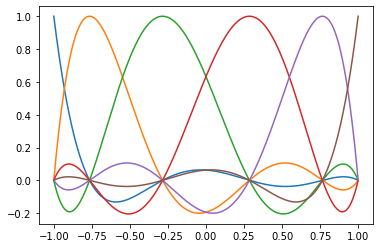

In [29]:
# N value defining the lagrange polynomials
n = 5

# Compute the n+1 GLL points
gllpts = gll(n)

# Define the domain interval [-1, +1] on 1000 points:
x = np.linspace(-1, 1, 1000)

# We will plot the Lagrange polynomials to check they are correct
fig, ax = plt.subplots()

print(f'Weights for degree {n}: ')
# Loop over the n+1 polynomials to compute the weights
for alpha in range(n+1): 
    # Integrand is simply the alpha'th lagrange polynomial of degree n
    integrand = lagrange(n, alpha, x, gllpts)
    
    # Plot lagrange polynomials as sanity check
    ax.plot(x, integrand)

    # Trapezoid rule to integrate
    weight = np.trapz(y=integrand, x=x)
    
    print(alpha, weight)
